# **MATH 1310 Final Project: Exploring Factors Influencing Loan Repayment**

## Authors: Samin Sharif, Arya Fadavi, Kensei N'toto

**Original Data Source: VENKATASUBRAMANIAN,SUNDARAMAHADEVAN. (2021). Credit EDA Case Study. https://www.kaggle.com/datasets/venkatasubramanian/credit-eda-case-study**

# Credit EDA Dataset Description

**Attributes for netflix_titles.csv dataset: [Important ones for our data analysis]**

1.CODE_GENDER: Gender of the client.

2.CNT_CHILDREN: Number of children the client has.

3.TARGET: Binary indicator of loan repayment difficulties (1 if difficulties, 0 otherwise).

4.AMT_CREDIT: Total credit amount requested by the client.

5.AMT_ANNUITY: Annuity of the loan.

6.AMT_INCOME_TOTAL: Total annual income of the client.

7.NAME_EDUCATION_TYPE: Level of education of the client.

8.DAYS_BIRTH: Age of the client in days (negative value representing days since birth).

9.WEEKDAY_APPR_PROCESS_START: Day of the week when the loan application process started.

10.HOUR_APPR_PROCESS_START: Hour of the day when the loan application process started.

# 1- Frame the problem

### Introduction and goal of the problem

The objective of this final project is to gain an understanding of the factors contributing to the inability to repay loans. We aim to dissect and frame the nature of these factors by exploring various financial, demographic, and application-related connections through the creation of Exploratory Data Analysis (EDA). The primary goal is to uncover patterns, relationships, and trends within the dataset, facilitating the identification of critical features that play a significant role in predicting challenges associated with loan repayment.


# Key Analyses
## Relationship between Number of Children and Loan Repayment Difficulties
We analyzed how the number of children per client correlates with their loan repayment difficulties. This examination provides insights into the potential influence of family size on the challenges clients may face in meeting their loan obligations.

# 2- Load the dataset

In [20]:
# Importing the libraries
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm
import scipy

# %matplotlib inline
# plt.style.use('ggplot')
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [21]:
app_df= pd.read_csv("application_data.csv") # Read dataset from the CSV file into a DataFrame

In [22]:
app_df.head() # Use head() to look at the first 5 rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
app_df.describe() # Use describe() method to see a summary of the numerical attributes

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [24]:
app_df.info() # Use info() to get a quick information from the data like columns, rows, and datatypes etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [25]:
app_df.shape # Check the shape of the df

(307511, 122)

# 3- Data Cleaning and Preprocessing

In [26]:
# Check for null values
null_values = app_df.isnull().sum()
print(null_values)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [27]:
# Drop all null values
app_df = app_df.dropna()
print(app_df.isnull().sum())

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64


In our data preprocessing, we chose to drop missing numerical values from the dataset instead of filling them with zeros or alternative values. Imputing arbitrary numerical values could introduce biases, affecting the validity of our analysis. We initially assessed missing values using app_df.isnull().sum(), identified varying counts of nulls, and then dropped all null values with app_df.dropna(). This ensures a clean dataset, free of missing numerical values, enhancing the reliability of our analysis.

In [28]:
ontime_df = app_df[app_df['TARGET'] == 0]
late_df = app_df[app_df['TARGET'] == 1]

#splits the DF into late and timely payments 


The original DataFrame was divided into two subsets—ontime_df and late_df—based on the 'TARGET' column. This division proves beneficial for focused analyses and facilitating streamlined model training along with binary/regression tasks. By isolating instances of timely and late payments, the approach enables a targeted exploration of distinct characteristics, aiding in the identification of patterns associated with successful loan repayments or challenges.

In [29]:
# We drop the Flag attributes and create new dataframes with the necessary variables we need
selected_columns = [
    'CODE_GENDER', 'CNT_CHILDREN', 'TARGET', 'AMT_CREDIT',
    'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',
    'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'
]

ontime_df = ontime_df[selected_columns]
late_df= late_df[selected_columns]
late_df

,CODE_GENDER,CNT_CHILDREN,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
255,M,1,1,1019205.0,31032.0,225000.0,Secondary / secondary special,-11356,MONDAY,14
492,M,0,1,180000.0,9000.0,99000.0,Secondary / secondary special,-8063,MONDAY,12
765,F,0,1,1323000.0,47650.5,450000.0,Higher education,-18740,TUESDAY,10
1471,F,2,1,450000.0,19066.5,90000.0,Secondary / secondary special,-13840,THURSDAY,15
1691,F,0,1,508495.5,26091.0,135000.0,Secondary / secondary special,-10581,MONDAY,12
...,...,...,...,...,...,...,...,...,...,...
304835,M,1,1,220500.0,17806.5,225000.0,Secondary / secondary special,-14769,MONDAY,12
305640,F,0,1,557005.5,30348.0,112500.0,Secondary / secondary special,-12243,MONDAY,11
306452,F,2,1,945000.0,30613.5,324000.0,Higher education,-10705,WEDNESDAY,11
306957,F,2,1,219249.0,16083.0,135000.0,Higher education,-13753,THURSDAY,14


In the transformation process, we streamlined the original DataFrame by excluding the 'FLAG' attributes, resulting in a more focused dataset. The refined DataFrames, ontime_df and late_df, now exclusively include essential variables related to gender, number of children, loan repayment status (TARGET), credit amount (AMT_CREDIT), annuity amount (AMT_ANNUITY), total income (AMT_INCOME_TOTAL), education type (NAME_EDUCATION_TYPE), age in days (DAYS_BIRTH), weekday of application processing (WEEKDAY_APPR_PROCESS_START), and hour of application processing (HOUR_APPR_PROCESS_START). This targeted extraction enhances clarity and efficiency for subsequent analyses, allowing for a more precise exploration of factors influencing timely and late loan repayments.

In [30]:
ontime_df['DAYS_BIRTH'] = pd.to_datetime(ontime_df['DAYS_BIRTH'], errors='coerce')
ontime_df['DAYS_BIRTH'] = ontime_df['DAYS_BIRTH'].dt.date
late_df['DAYS_BIRTH'] = pd.to_datetime(late_df['DAYS_BIRTH'], errors='coerce')
late_df['DAYS_BIRTH'] = late_df['DAYS_BIRTH'].dt.date
ontime_df

,CODE_GENDER,CNT_CHILDREN,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
71,M,0,0,573628.5,24435.0,103500.0,Secondary / secondary special,1969-12-31,MONDAY,18
124,F,1,0,260725.5,16789.5,202500.0,Secondary / secondary special,1969-12-31,TUESDAY,11
152,F,0,0,675000.0,53329.5,202500.0,Higher education,1969-12-31,MONDAY,13
161,M,0,0,263686.5,24781.5,162000.0,Higher education,1969-12-31,THURSDAY,16
296,M,0,0,545040.0,20677.5,76500.0,Secondary / secondary special,1969-12-31,TUESDAY,10
...,...,...,...,...,...,...,...,...,...,...
307215,M,0,0,225000.0,15034.5,157500.0,Secondary / secondary special,1969-12-31,WEDNESDAY,14
307358,F,2,0,361462.5,16051.5,112500.0,Secondary / secondary special,1969-12-31,WEDNESDAY,9
307359,F,1,0,675000.0,21906.0,99000.0,Secondary / secondary special,1969-12-31,FRIDAY,9
307456,F,0,0,270000.0,15075.0,94500.0,Secondary / secondary special,1969-12-31,TUESDAY,11


The 'DAYS_BIRTH' column was converted by turning the negative number format into a datetime variable using the pd.to_datetime function. This transformation was done to represent birth dates in a positive format, making it more intuitive and consistent for analysis. The resulting 'DAYS_BIRTH' values are now in the standard 'YYYY-MM-DD' date format, improving interpretability and enabling the use of date-related functions for more meaningful insights and comparisons within the dataset.

In [67]:
# same result
ontime_df.isnull().sum()
late_df.isnull().sum() 

CODE_GENDER                   0
CNT_CHILDREN                  0
TARGET                        0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_INCOME_TOTAL              0
NAME_EDUCATION_TYPE           0
DAYS_BIRTH                    0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
dtype: int64

In [ ]:
print(df["DAYS_BIRTH"].unique())

With the completion of the date cleaning process, the dataset is now free of null values, and all columns are in a cleaned and comprehensible format. This lays a solid foundation for the now EDA phase, where these columns will be used to extract meaningful information about the dataset. The cleaned data enables us to find more accurate and insightful exploration of patterns, relationships, and trends

# 4- Exploratory Data Analysis and Hypothesis Testing

1 - Relationship between Number of Children and Loan Repayment Difficulties

In [6]:
np.corrcoef(app_df['TARGET'],app_df['CNT_CHILDREN'])[0,1]

0.01918713359627012

This is the correlation coefficient between the 'TARGET' variable, indicating loan repayment difficulties, and the 'CNT_CHILDREN' variable, representing the number of children a client has. The resulting value, being close to zero, indicates a weak positive correlation. This suggests that, on average, clients with a higher number of children may exhibit a slightly elevated probability of facing challenges in loan repayment. The positive correlation implies a tendency for an increase in the number of children to be associated with a slightly higher likelihood of payment difficulties. 

In [7]:
on_time_ttest=ontime_df.CNT_CHILDREN
late_ttest=late_df.CNT_CHILDREN

statistic, pvalue = stats.ttest_ind(on_time_ttest,late_ttest, equal_var=False)
statistic, pvalue

(-10.191428932864952, 2.3811458429026633e-24)

H0:μ on-time = μ late </br>
H1: μ on-time ≠ μ late

The null hypothesis (H0) in this t-test is that the mean number of children ('CNT_CHILDREN') is the same for both on-time and late repayment groups. The rejection of the null hypothesis (H1), supported by the very small p-value, indicates strong evidence that the means of the two groups are significantly different.
 
 
Since the p-value (2.3811458429026633e-24) is very close to zero (much smaller than commonly used significance levels like 0.05), you would reject the null hypothesis. The negative sign of the test statistic suggests that the mean of the 'CNT_CHILDREN' variable in the two groups (on-time and late) is significantly different.
The extremely small p-value indicates strong evidence against the null hypothesis, suggesting that the observed difference in means is unlikely to be due to random chance.
In summary, the results of the t-test suggest that there is a significant difference in the means of 'CNT_CHILDREN' between the on-time and late groups in your data and that the number of children is a relevant factor influencing repayment patterns. 







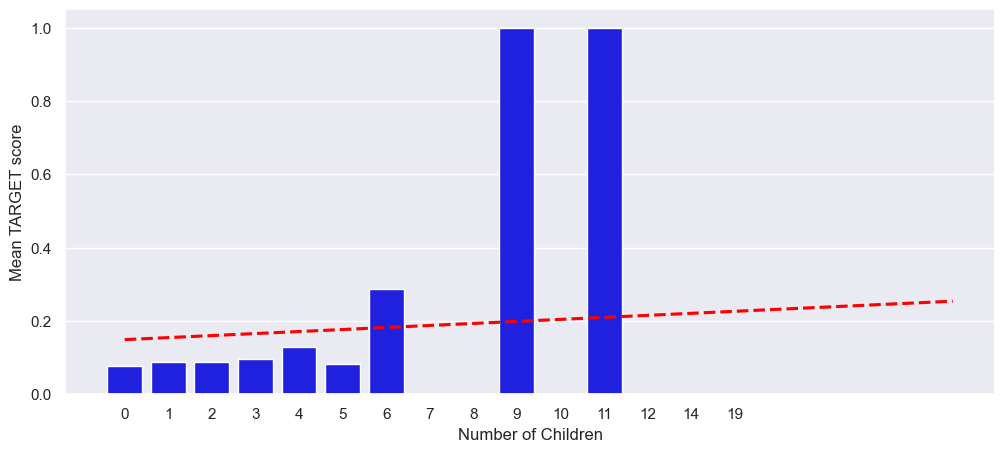

In [9]:
target_mean = app_df.groupby(by="CNT_CHILDREN").TARGET.mean()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
sns.barplot(x= target_mean.index, y = target_mean.values, color = 'blue')
sns.regplot(x=target_mean.index, y=target_mean.values, scatter = False, color="red", ci=None, line_kws={"linestyle": "--"})


plt.ylabel("Mean TARGET score")
plt.xlabel("Number of Children")
plt.show()

The closer the mean TARGET score is to 1, the more clients with that number of children have confronted difficulties when repaying their loans. After 6 children, the means are either 0 or 1. This is due to the fact that the number of values drops significantly because having more than 6 kids is highly irregular. Thus, for the scope of this study their means are not particularily relevant to our analysis. Outliers are visualized on the graphs below.


We see that as the number of children increases, the TARGET score means are also increasing suggesting that the regression line supports our findings in the correlation coefficient that there exists a weak but positive correlation between the number of children and the inability to repay loans.
The proportions below support the same conclusion, clients who repay their loans have a higher proportion of 0 children by nearly 4%, and the trend continues for the subsequent amounts of children.  

2 - relationship between target score and hour the application was processed

In [13]:
np.corrcoef(app_df['TARGET'],app_df['HOUR_APPR_PROCESS_START'])[0,1]
# this correlation coeeficient implies that there is a weak and negative correlation between TARGET score 
# and the hour where the application is started. Essientially, the later in the day the application is 
# submitted the more likely the client is to repay the loan on time


-0.024165831430094386

In [14]:
on_time_ttest=ontime_df.HOUR_APPR_PROCESS_START
late_ttest=late_df.HOUR_APPR_PROCESS_START

statistic, pvalue = stats.ttest_ind(on_time_ttest,late_ttest, equal_var=False)
statistic, pvalue

# same as with the children, supports there is a significicant difference since p<0.05

(13.332374480762848, 1.9686077424188985e-40)

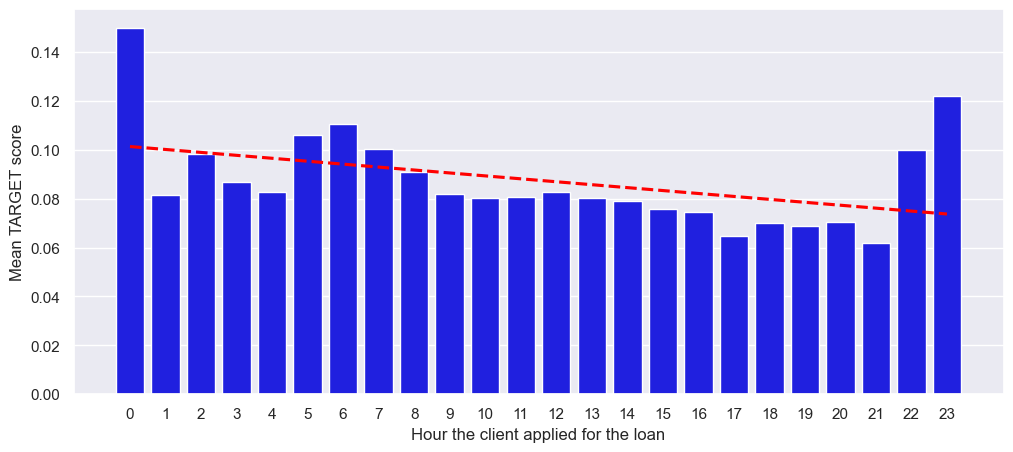

In [15]:
target_mean = app_df.groupby(by="HOUR_APPR_PROCESS_START").TARGET.mean()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
sns.barplot(x= target_mean.index, y = target_mean.values, color = 'blue')
sns.regplot(x=target_mean.index, y=target_mean.values, scatter = False, color="red", ci=None, line_kws={"linestyle": "--"})


plt.ylabel("Mean TARGET score")
plt.xlabel("Hour the client applied for the loan")
plt.show()

# graphs the average mean score per hour, people who begin their application at 11pm or midnight
# boast a higher average TARGET score. Maybe due to the fact that people who begin applications
# late are trying to beat a deadline and procrastinated until the last minute. 
# These tendencies can potentially also be transfer loan repayment, thus making it more likely they repay late.

3 - miscellaneous visualization of the data, credit amount per occupation, average TARGET score per occupation, and distribution of education levels for target 0 and target 1 

In [16]:
app_df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

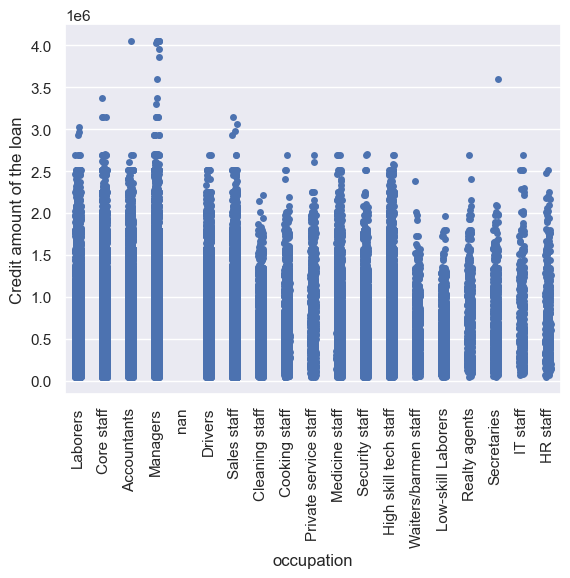

In [17]:
ax = sns.stripplot(x="OCCUPATION_TYPE", y="AMT_CREDIT", data=app_df)
plt.xlabel('occupation')
plt.ylabel('Credit amount of the loan')
plt.xticks(rotation=90)
plt.show()

#Visualizes the credit amount of the loan for each occupation type, 
# this denotes each occuptation types overall value to the company since higher credit amount means more profit
# for the business

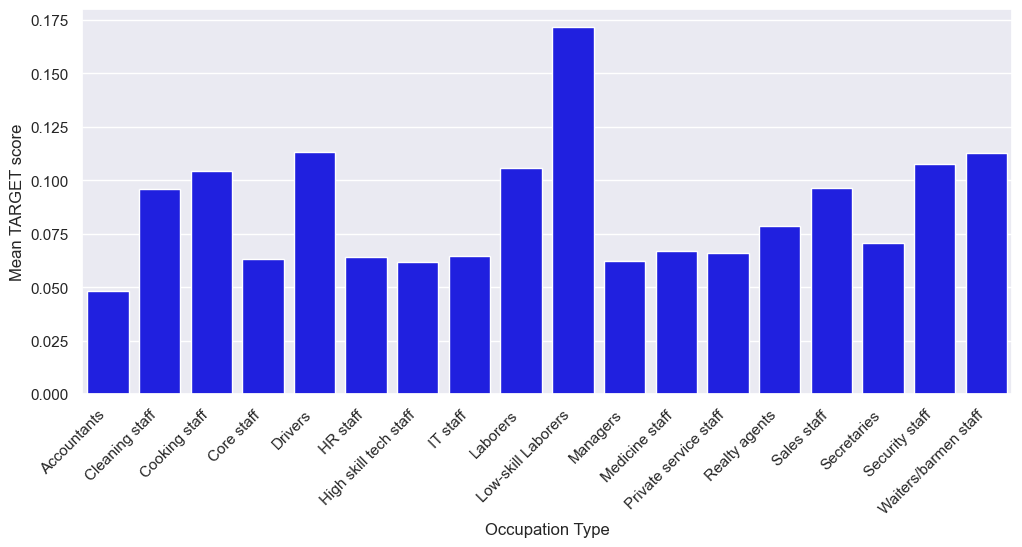

In [18]:
target_mean = app_df.groupby(by="OCCUPATION_TYPE").TARGET.mean()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
sns.barplot(x= target_mean.index, y = target_mean.values, color = 'blue')
plt.xticks(rotation=45, ha='right')


plt.ylabel("Mean TARGET score")
plt.xlabel("Occupation Type")
plt.show()

# ^Plots the average mean score for each occupation type. The higher the average score, the more likely there is 
# difficulties repaying loans. Low-skill labourers have the highest average mean score while accountants have the 
# lowest.

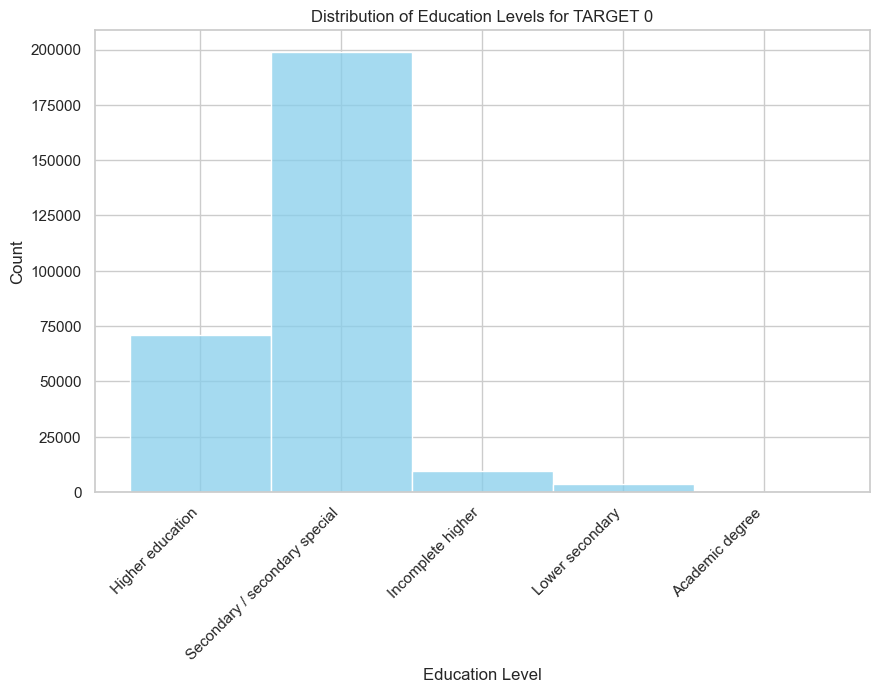

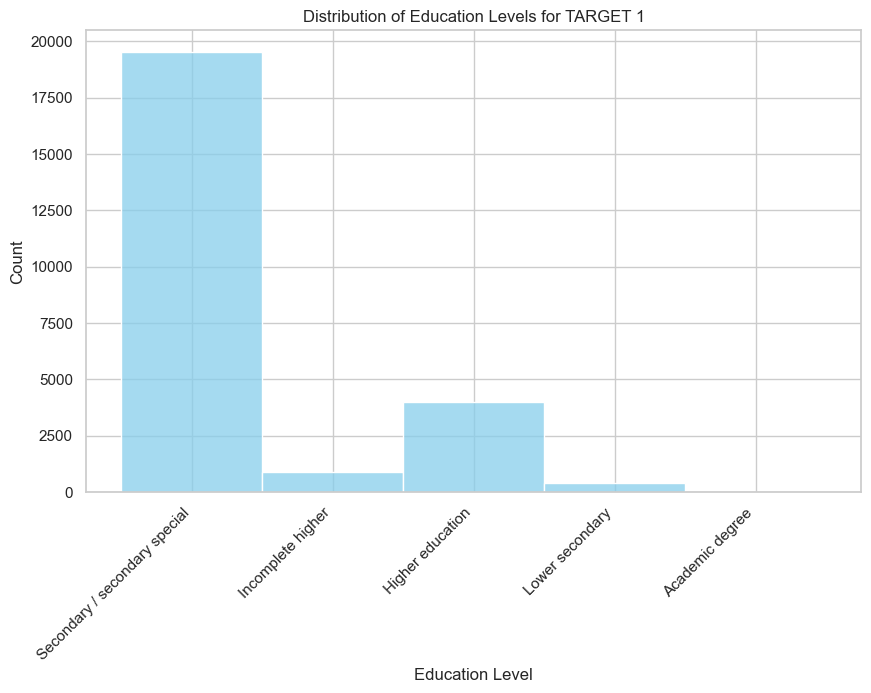

In [19]:
sns.set(style="whitegrid")
e_order = ontime_df['NAME_EDUCATION_TYPE'].unique()



plt.figure(figsize=(10, 6))
sns.histplot(data=ontime_df, x='NAME_EDUCATION_TYPE', bins=len(ontime_df['NAME_EDUCATION_TYPE'].unique()), kde=False, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels for TARGET 0')

plt.xticks(rotation=45, ha='right')

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=late_df, x='NAME_EDUCATION_TYPE', bins=len(late_df['NAME_EDUCATION_TYPE'].unique()), kde=False, color='skyblue' )
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels for TARGET 1')

plt.xticks(rotation=45, ha='right')

plt.show()


4 - do people who take out loans that are a bigger part of their income more likely not to repay their loans?

QUESTION BEING ANSWERED: DO PEOPLE WHO TAKE OUT PEOPLE WHO TAKE OUT LOANS THAT CONSTITUTE A HIGHER PROPORTION OF THEIR INCOME HAVE MORE DIFFICULTIES REPAYING LOANS?


INTERPRETATION (FROM CHAT GPT SO REWORD): 

Average Proportion:

Clients who made on-time payments have an average proportion of approximately 3.96, indicating that, on average, their loan amounts are about 3.96 times their annual income.
Clients who had difficulties repaying the loan have a slightly lower average proportion of approximately 3.89, indicating that, on average, their loan amounts are about 3.89 times their annual income.

P-value:

The p-value is very small (1.21e-05 or 0.000012).
The p-value is the probability of observing a t-statistic as extreme as the one computed, assuming that the null hypothesis is true (i.e., assuming there is no difference between the groups).
A small p-value (typically below a chosen significance level, e.g., 0.05) indicates that you can reject the null hypothesis.


Null Hypothesis (H0):
There is no significant difference in the proportion of income represented by the loan between clients who made on-time payments and those who had difficulties repaying the loan.


Alternative Hypothesis (H1):
There is a significant difference in the proportion of income represented by the loan between clients who made on-time payments and those who had difficulties repaying the loan.

H0: μ On Time = μ Late
Ha: μ On Time ≠ μ Late

The small p-value from your t-test supports the rejection of the null hypothesis, providing evidence in favor of the alternative hypothesis that there is a significant difference in the proportion of income represented by the loan between the two groups.

Conclusion:

With a very small p-value, you can reject the null hypothesis.
Therefore, there is strong evidence to suggest that there is a significant difference in the proportion of income represented by the loan between clients who made on-time payments and those who had difficulties repaying the loan.
In practical terms, this may suggest that clients who had difficulties repaying the loan tended to take out loans that constituted a larger proportion of their income compared to clients who made on-time payments.

I ALSO CREATED A BOX PLOT TO VISUALIZE THE THESE RESULTS

In [20]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have two dataframes: on_time_payment and late_payment

# Calculate the proportion of income represented by the loan for each client
ontime_df['proportion'] = ontime_df['AMT_CREDIT'] / ontime_df['AMT_INCOME_TOTAL']
late_df['proportion'] = late_df['AMT_CREDIT'] / late_df['AMT_INCOME_TOTAL']

# Calculate the average proportion for each group
average_proportion_on_time = ontime_df['proportion'].mean()
average_proportion_late = late_df['proportion'].mean()

# Print the average proportions
print("Average Proportion (On Time Payment):", average_proportion_on_time)
print("Average Proportion (Late Payment):", average_proportion_late)

# Perform a t-test to check if there is a significant difference
statistic, pvalue = stats.ttest_ind(ontime_df['proportion'], late_df['proportion'], equal_var=False)
print("T-test Statistic:", statistic)
print("P-value:", pvalue)

# Interpret the results
if pvalue < 0.05:
    print("There is a significant difference in the proportion of income represented by the loan between on-time and late payments.")
else:
    print("There is no significant difference in the proportion of income represented by the loan between on-time and late payments.")


Average Proportion (On Time Payment): 3.963729088910814
Average Proportion (Late Payment): 3.887438479317676
T-test Statistic: 4.377303640868856
P-value: 1.205677997004768e-05
There is a significant difference in the proportion of income represented by the loan between on-time and late payments.


/var/folders/2l/qjwz7ymd6d12fv8mhw99nvmm0000gn/T/ipykernel_405/1705758808.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2l/qjwz7ymd6d12fv8mhw99nvmm0000gn/T/ipykernel_405/1705758808.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



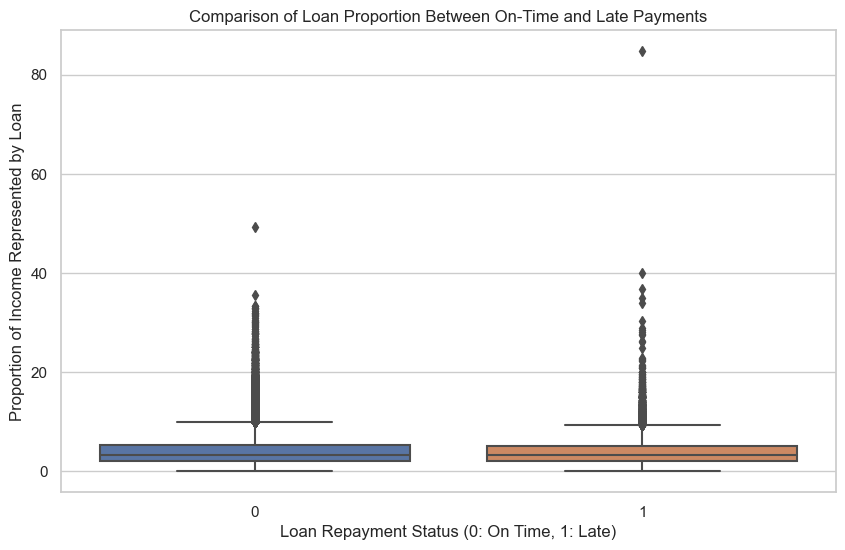

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data from both dataframes
combined_data = pd.concat([ontime_df[['proportion', 'TARGET']], late_df[['proportion', 'TARGET']]])

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='proportion', data=combined_data)
plt.xlabel('Loan Repayment Status (0: On Time, 1: Late)')
plt.ylabel('Proportion of Income Represented by Loan')
plt.title('Comparison of Loan Proportion Between On-Time and Late Payments')
plt.show()


5 how does a client's age impact his ability to repay loans 

CHATGPT PLS REWORD

QUESTION ANSWERED BELOW: HOW DOES A CLIENT'S AGE IMPACT HIS ABILITY TO REPAY LOANS?


Average Ages:

Average age for clients with on-time payments: 44.21 years

Average age for clients with late payments: 40.78 years


T-test Results:

T-test Statistic: 45.01
P-value: 0.0

(null hypothesis) H0 :There is no significant difference in the average age between clients with on-time payments and those with late payments.
(alternative hypothesis) Ha:There is a significant difference in the average age between clients with on-time payments and those with late payments.

H0: μ On Time = μ Late
Ha: μ On Time ≠ μ Late


Interpretation:
The t-test statistic measures the difference in average age between the two groups relative to the variability within each group.
The p-value is the probability of observing a t-statistic as extreme as the one computed, assuming that the null hypothesis (no difference in average age) is true.

Conclusion:
The extremely small p-value (practically zero) suggests that there is a statistically significant difference in the average age between clients with on-time payments and those with late payments.
With such a low p-value, you would reject the null hypothesis that there is no difference in average age between the two groups.

Practical Implications:
The results indicate that age may be a significant factor associated with loan repayment behavior.
The average age difference between the two groups suggests that, on average, clients with late payments tend to be younger than those with on-time payments.

DATA CLEANING; DIVIDE BY 365 TO CONVERT DAYS_BIRTH INTO YEARS, THEN MULTIPLY BY -1 SINCE THE VALUES OF DAYS_BIRTH ARE NEGATIVE
CHATGPT PLS REWORD^^

In [22]:
app_df['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [23]:
# convert age to years
ontime_df['age'] = -(ontime_df['DAYS_BIRTH'] / 365)
late_df['age'] = -(late_df['DAYS_BIRTH'] / 365)

#the average age for each group
average_age_ontime = ontime_df['age'].mean()
average_age_late = late_df['age'].mean()

# average ages
print("Average age (On Time Payment):", average_age_ontime)
print("Average age (Late Payment):", average_age_late)

#T-test
statistic, pvalue = stats.ttest_ind(ontime_df['age'], late_df['age'], equal_var=False)
print("T-test Statistic:", statistic)
print("P-value:", pvalue)


if pvalue < 0.05:
    print("There is a significant difference between the age of on-time and late payment clients.")
else:
    print("There is no significant difference between the age of on-time and late payment clients.")

Average age (On Time Payment): 44.214181909954014
Average age (Late Payment): 40.78035089461849
T-test Statistic: 45.00618796126963
P-value: 0.0
There is a significant difference between the age of on-time and late payment clients.


/var/folders/2l/qjwz7ymd6d12fv8mhw99nvmm0000gn/T/ipykernel_405/3504686487.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2l/qjwz7ymd6d12fv8mhw99nvmm0000gn/T/ipykernel_405/3504686487.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
mean_ontime = ontime_df['age'].mean()
mean_late = late_df['age'].mean()

std_ontime = ontime_df['age'].std()
std_late = late_df['age'].std()

n_ontime = len(ontime_df)
n_late = len(late_df)

pooled_std = np.sqrt(((n_ontime - 1) * std_ontime**2 + (n_late - 1) * std_late**2) / (n_ontime + n_late - 2))
cohen_d = (mean_ontime - mean_late) / pooled_std

print("Cohen's d:", cohen_d)


Cohen's d: 0.2880850985520036


A Cohen's d value of 0.288 suggests a small to medium effect size. In the context of comparing the age difference between on-time and late payment groups, this indicates that there is a noticeable difference in the means of the two groups, but the effect is not extremely large. Cohen's D speaks to the real world significance of the difference.

Interpretation of Cohen's d values:

Small effect: ∣d∣≤0.2
Medium effect: 0.2<∣d∣≤0.5
Large effect: ∣d∣>0.5
So, in your case, the age difference between on-time and late payment clients has a small to medium effect size.

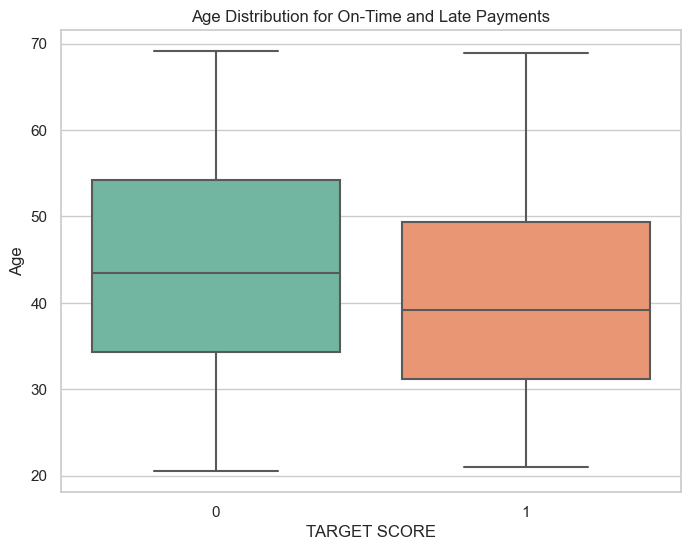

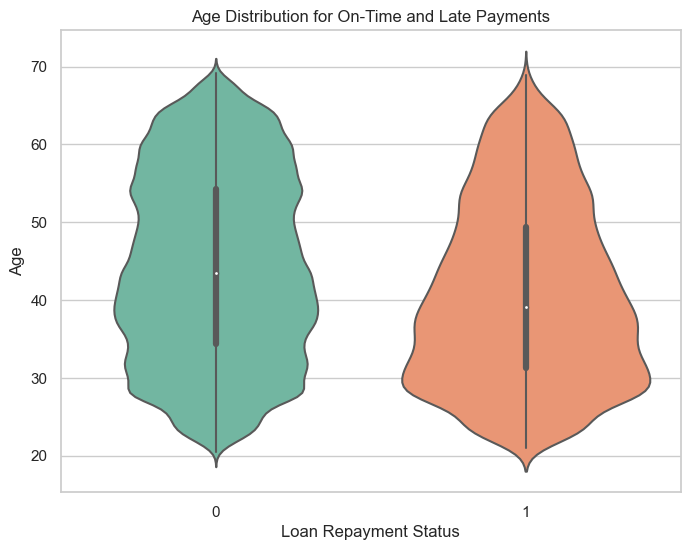

In [25]:
combined_age_data = pd.concat([ontime_df[['age', 'TARGET']], late_df[['age', 'TARGET']]])


plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='age', data=combined_age_data, palette='Set2')
plt.title('Age Distribution for On-Time and Late Payments')
plt.xlabel('TARGET SCORE')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='TARGET', y='age', data=combined_age_data, palette='Set2')
plt.title('Age Distribution for On-Time and Late Payments')
plt.xlabel('Loan Repayment Status')
plt.ylabel('Age')
plt.show()


# use whichever graph you feel most comfortable analyzing.


In [26]:
summary_stats = combined_age_data.groupby('TARGET')['age'].describe()
print(summary_stats)

           count       mean        std        min        25%        50%  \
TARGET                                                                    
0       282686.0  44.214182  11.956715  20.517808  34.345205  43.498630   
1        24825.0  40.780351  11.487245  21.035616  31.221918  39.128767   

              75%        max  
TARGET                        
0       54.229452  69.120548  
1       49.416438  68.953425  


Furthermore, we aim to find which age group has the most difficulites repaying their loans. We divided the data  by age groups of 5 years and calculated the proportion in each group. The plot supports our findings in the last graph, in younger age groups, the orange bar (representing difficulties with repayment is the larger proportion) then as age increases the inverse starts to become true.
I set the range from 20 to 75 since those were the max and min values given to me from the .describe above.

/var/folders/2l/qjwz7ymd6d12fv8mhw99nvmm0000gn/T/ipykernel_405/2058390716.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2l/qjwz7ymd6d12fv8mhw99nvmm0000gn/T/ipykernel_405/2058390716.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x600 with 0 Axes>

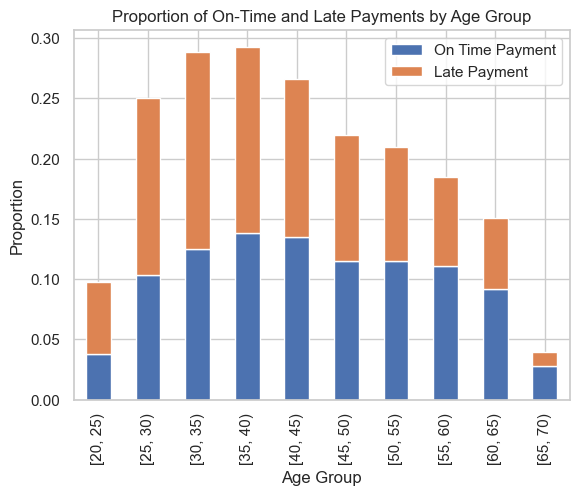

In [27]:
# age groups of 5 years
age_bins = np.arange(20, 75, 5)
ontime_df['age_group'] = pd.cut(ontime_df['age'], bins=age_bins, right=False)
late_df['age_group'] = pd.cut(late_df['age'], bins=age_bins, right=False)

# calculate proportions of ontime and late clients in each group
ontime_age_proportions = ontime_df['age_group'].value_counts(normalize=True).sort_index()
late_age_proportions = late_df['age_group'].value_counts(normalize=True).sort_index()

# combine into one dataframe
age_proportions_df = pd.DataFrame({'On Time Payment': ontime_age_proportions,'Late Payment': late_age_proportions})


plt.figure(figsize=(12, 6))
age_proportions_df.plot(kind='bar', stacked=True)
plt.title('Proportion of On-Time and Late Payments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()


In [28]:
proportion_differential = ontime_age_proportions - late_age_proportions
proportion_differential

# The age group with the largest differential in absolute value is the between 25 and 30, 
# indicating the largest variance of repayment likelyhood amongst availble age groups

[20, 25)   -0.022573
[25, 30)   -0.044129
[30, 35)   -0.038260
[35, 40)   -0.016124
[40, 45)    0.003876
[45, 50)    0.010112
[50, 55)    0.021026
[55, 60)    0.036927
[60, 65)    0.033647
[65, 70)    0.015498
Name: age_group, dtype: float64

6 - credit amount analysis, 
- first show that there is no significant relationship between credit amount and average target score
- second, show which variables have a relationship with credit amount 

In [29]:
corr_mat  =app_df[[  'CODE_GENDER','CNT_CHILDREN','TARGET','AMT_CREDIT',
    'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',
    'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',"AMT_GOODS_PRICE",'FLAG_MOBIL', 'CNT_FAM_MEMBERS']].corr()
corr_mat

# use the correlation matrix to find potential relationships 

/var/folders/2l/qjwz7ymd6d12fv8mhw99nvmm0000gn/T/ipykernel_405/2565352617.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CNT_CHILDREN,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,DAYS_BIRTH,HOUR_APPR_PROCESS_START,AMT_GOODS_PRICE,FLAG_MOBIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.019187,0.002145,0.021374,0.012882,0.330938,-0.007292,-0.001827,0.001041,0.879161
TARGET,0.019187,1.000000,-0.030369,-0.012817,-0.003982,0.078239,-0.024166,-0.039645,0.000534,0.009308
AMT_CREDIT,0.002145,-0.030369,1.000000,0.770138,0.156870,-0.055436,0.052738,0.986968,0.001436,0.063160
AMT_ANNUITY,0.021374,-0.012817,0.770138,1.000000,0.191657,0.009445,0.052269,0.775109,0.000149,0.075539
AMT_INCOME_TOTAL,0.012882,-0.003982,0.156870,0.191657,1.000000,0.027261,0.036459,0.159610,0.000325,0.016342
DAYS_BIRTH,0.330938,0.078239,-0.055436,0.009445,0.027261,1.000000,0.091064,-0.053442,-0.003084,0.278894
HOUR_APPR_PROCESS_START,-0.007292,-0.024166,0.052738,0.052269,0.036459,0.091064,1.000000,0.062320,-0.000517,-0.012226
AMT_GOODS_PRICE,-0.001827,-0.039645,0.986968,0.775109,0.159610,-0.053442,0.062320,1.000000,0.001399,0.061185
FLAG_MOBIL,0.001041,0.000534,0.001436,0.000149,0.000325,-0.003084,-0.000517,0.001399,1.000000,0.000302
CNT_FAM_MEMBERS,0.879161,0.009308,0.063160,0.075539,0.016342,0.278894,-0.012226,0.061185,0.000302,1.000000


CREDIT ANALYSIS: 

As a business, our client should try to maximize their profits. Initially, it would be logical to assume that granting loans with a higher credit will result in a greater return, however, if those clients fail to repay then the risk is also greater. It could be beneficial to offer smaller, lower risk loans if the data suggests that clients who receive a lower credit amountloan are more likely to pay back. The company has a set amount of capital it can loan out, thus this part of the exploration will aim to determine how they should invest their capital. 

Should the company focus more on making multiple smaller loans or fewer larger loans? 

If no significant relationship exists, our client should then aim to provide larger credit amount loans to gain a larger return. What factors are associated with a credit amount? 



In [30]:
# seeing if there exists a significant correlation between the credit amount of a loan and target. 


correlation_coefficient = np.corrcoef(app_df['TARGET'],app_df['AMT_CREDIT'])[0,1]
print('correlation coefficient:', correlation_coefficient)
# implies weak negative correlation between the target score and the amount of credit

# taking the median of AMT_CREDIT so I can divide it into two dataframes, 
# one containing the higher end of prices and one containing the lower end

median = app_df['AMT_CREDIT'].quantile()
print('median:', median)
small_loan = app_df[app_df['AMT_CREDIT'] < 513531]
large_loan = app_df[app_df['AMT_CREDIT'] > 513531]


# take the t-test of these dataframes to determine if there is a
# significant difference between the AMT_CREDIT in large and small loans
small_ttest=small_loan.AMT_CREDIT
large_ttest=large_loan.AMT_CREDIT
statistic, pvalue = stats.ttest_ind(small_ttest,large_ttest, equal_var=False)
print('T-stat', statistic, 'P-value', pvalue)

# take Cohen's D to measure effect size
mean_difference = large_loan['TARGET'].mean() - small_loan['TARGET'].mean()
pooled_std = np.sqrt((large_loan['TARGET'].std()**2 + small_loan['TARGET'].std()**2) / 2)
cohen_d = mean_difference / pooled_std

print("Cohen's d:", cohen_d)
# Cohen's d suggests a small decrease in the mean target score for large loans compared to small loans.

print("  ")
print("  ")

# regression results, used to determine R-squared and coefficient magnitude
X = sm.add_constant(app_df['AMT_CREDIT'])
y = app_df['TARGET']

model = sm.OLS(y, X).fit()
print(model.summary())




correlation coefficient: -0.030369286461429754
median: 513531.0
T-stat -655.5471387746909 P-value 0.0
Cohen's d: -0.027093402032914778
  
  
                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     283.9
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.15e-63
Time:                        01:39:07   Log-Likelihood:                -36305.
No. Observations:              307511   AIC:                         7.261e+04
Df Residuals:                  307509   BIC:                         7.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   



The analysis you've conducted suggests the following:

The OLS Regression Results: show that while there is a statistically significant relationship between AMT_CREDIT and TARGET, the low R-suared and coefficient magnitude suggest a very weak linear relationship between the credit amount of the loan and the target score.


The correlation coefficient: implies weak negative correlation between the target score and the amount of credit


T-test Results:
T-statistic: the t-statistic is quite large (negative), indicating a significant difference between the means of small and large loans.
P-value: The p-value is very close to zero (P-value: 0.0). This suggests strong evidence against the null hypothesis, indicating that the difference in means is statistically significant.

However, Cohen's d:
Cohen's d is a measure of the effect size, representing the standardized difference between two means. In your case, Cohen's d is calculated as approximately -0.027, which is a small effect size.

Conclusion:
While the effect size is statistically significant due to the large sample size, it's important to note that the practical significance (effect size) is small. (in the case of our client, practical significance is more important)
In summary, your analysis indicates a small difference in the mean target score between clients with small and large loans. This implies that, on average, clients with large loans may have a slightly lower likelihood of repaying their loans on time compared to those with small loans. 


PLS REWORD CHATGPT

Quantile: 0 - 0.1
Number of observations: 33204
Mean TARGET score: 0.06722081676906397

Quantile: 0.1 - 0.2
Number of observations: 31721
Mean TARGET score: 0.07777182308250055

Quantile: 0.2 - 0.3 
Number of observations: 27391
Mean TARGET score: 0.08207075316709868

Quantile: 0.3 - 0.4
Number of observations: 30707
Mean TARGET score: 0.10033542840394698

Quantile: 0.4 - 0.5
Number of observations: 30826
Mean TARGET score: 0.09589307727243236

Quantile: 0.5 - 0.6
Number of observations: 30726
Mean TARGET score: 0.10522033457007095

Quantile: 0.6 - 0.7
Number of observations: 34066
Mean TARGET score: 0.08536370574766629

Quantile: 0.7 - 0.8
Number of observations: 29958
Mean TARGET score: 0.07079911876627278

Quantile: 0.8 - 0.9
Number of observations: 28319
Mean TARGET score: 0.06882305166142873

Quantile: 0.9 - 1
Number of observations: 30593
Mean TARGET score: 0.053280162128591504



/var/folders/2l/qjwz7ymd6d12fv8mhw99nvmm0000gn/T/ipykernel_405/2895619803.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




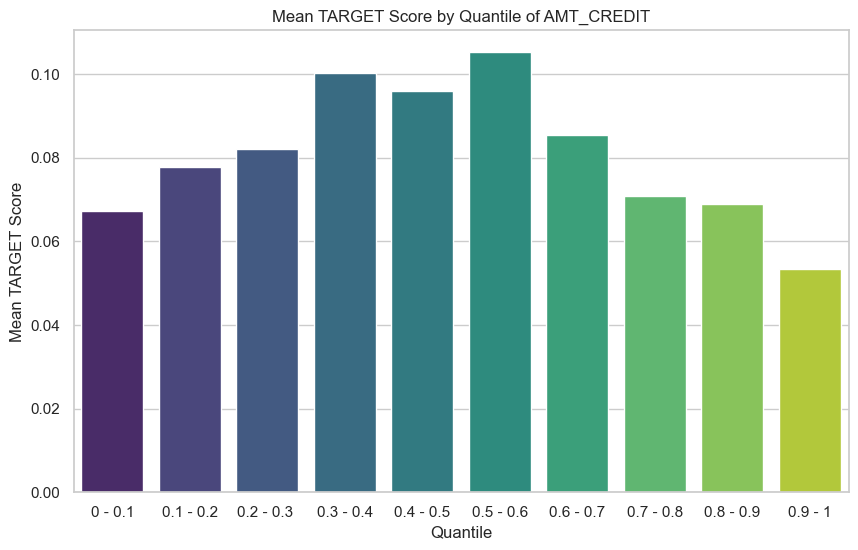

In [31]:
# to verify that there exists no practical relationship between AMT_credit and TARGET score,
# ive plotted each credit amount quantile to see how the target mean changes as credit amount increases

quantile = ['0 - 0.1', '0.1 - 0.2', '0.2 - 0.3 ', '0.3 - 0.4',
            '0.4 - 0.5', '0.5 - 0.6', '0.6 - 0.7', '0.7 - 0.8', '0.8 - 0.9', '0.9 - 1']

app_df['quantile'] = pd.qcut(app_df['AMT_CREDIT'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=quantile)

quantile_groups = app_df.groupby('quantile')

for name, group in quantile_groups:
    print(f"Quantile: {name}")
    print(f"Number of observations: {len(group)}")
    print(f"Mean TARGET score: {group['TARGET'].mean()}\n")

# Set seaborn style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='quantile', y='TARGET', data=app_df, ci=None, palette='viridis')
plt.xlabel('Quantile')
plt.ylabel('Mean TARGET Score')
plt.title('Mean TARGET Score by Quantile of AMT_CREDIT')
plt.show()



Since we can observe a normal distribution on the graph (not one that trends upwards or downwards) and our statistical analysis revealed weak linear and practical signficance, it is safe to assume going forward that the credit amount doesn't sufficiently impact the TARGET score. Thus, the client should attempt to sell higher credit loans to maximize profits.  

First, lets look at income:

In [32]:
correlation_coefficient = np.corrcoef(app_df['AMT_INCOME_TOTAL'],app_df['AMT_CREDIT'])[0,1]
print('correlation coefficient:', correlation_coefficient)
# correlation between income and credit amount of loan

credit=app_df.AMT_CREDIT
income=app_df.AMT_INCOME_TOTAL
statistic, pvalue = stats.ttest_ind(credit,income, equal_var=False)
print('T-stat', statistic, 'P-value', pvalue)
# t-test, p-value

X = sm.add_constant(app_df['AMT_CREDIT'])
y = app_df['AMT_INCOME_TOTAL']

model = sm.OLS(y, X).fit()
print(model.summary())
# regression model



correlation coefficient: 0.15687027185193061
T-stat 510.71148374958113 P-value 0.0
                            OLS Regression Results                            
Dep. Variable:       AMT_INCOME_TOTAL   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     7758.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:39:07   Log-Likelihood:            -4.2384e+06
No. Observations:              307511   AIC:                         8.477e+06
Df Residuals:                  307509   BIC:                         8.477e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

Model Fit (R-squared):

R-squared measures the proportion of the variance in the dependent variable (AMT_CREDIT) that is explained by the independent variable(s) (AMT_INCOME_TOTAL) in the model.
In this case, the R-squared is 0.020, indicating that approximately 2.0% of the variance in AMT_CREDIT is explained by AMT_INCOME_TOTAL. The model does not explain a large portion of the variability in AMT_CREDIT.

Statistical Significance (P-values):

The p-value associated with AMT_INCOME_TOTAL is very close to zero (0.000), suggesting that there is a statistically significant relationship between AMT_INCOME_TOTAL and AMT_CREDIT. The relationship is unlikely to be due to random chance.
Effect Size (Coefficient Interpretation):

For every one-unit increase in AMT_INCOME_TOTAL, we expect an increase of 0.2247 units in AMT_CREDIT, holding other factors constant.

Conclusion:

The model suggests a statistically significant positive relationship between AMT_INCOME_TOTAL and AMT_CREDIT. However, the R-squared value indicates that the model explains a small proportion of the variability in AMT_CREDIT. Other factors not included in the model might play a significant role in determining credit amounts.

LETS VIZUALIZE THE RELATIONSHIPS BETWEEN CREDIT AMOUNT AND OTHER RELEVANT VARIABLES.

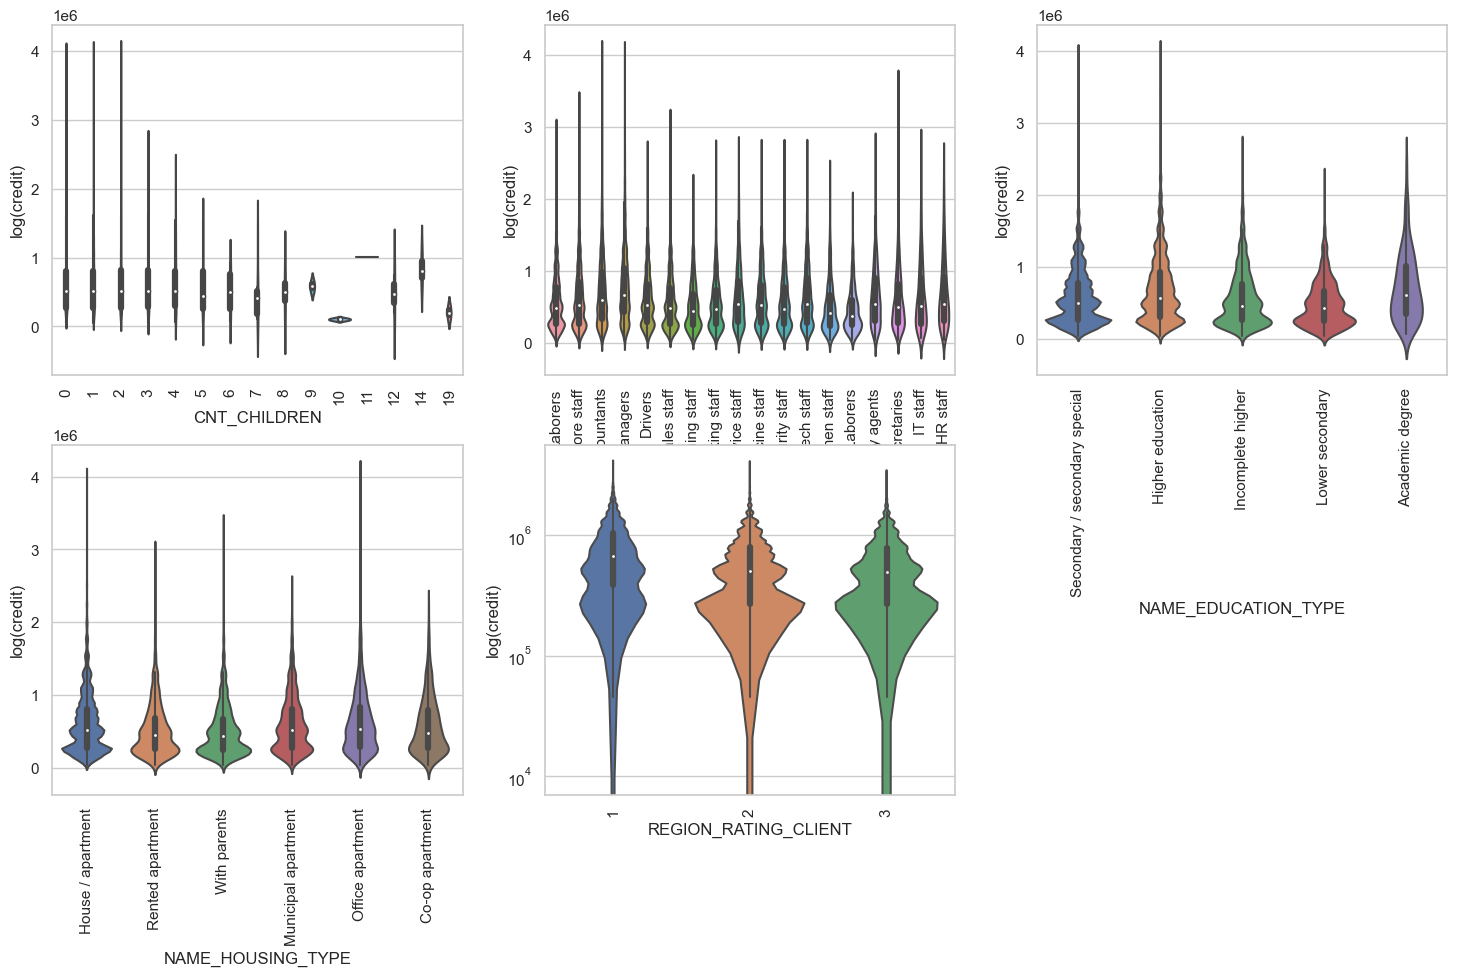

In [35]:
plt.figure(figsize=(18,10))
num_rows = 2
num_cols = 3
app_df2 = app_df.copy()  
app_df2['log(credit)'] = app_df["AMT_CREDIT"]


columns = ["CNT_CHILDREN", "OCCUPATION_TYPE", "NAME_EDUCATION_TYPE", 'NAME_HOUSING_TYPE','REGION_RATING_CLIENT']

for i, var in enumerate(columns):
    plt.subplot(num_rows, num_cols, i % (num_rows * num_cols) + 1)  # adjust indexing
    sns.violinplot(x=var, y='log(credit)', data=app_df2) #print violin plots for categorical data


    plt.xticks(rotation=90)

# Use log scale for the y-axis
plt.yscale('log')



plt.show()


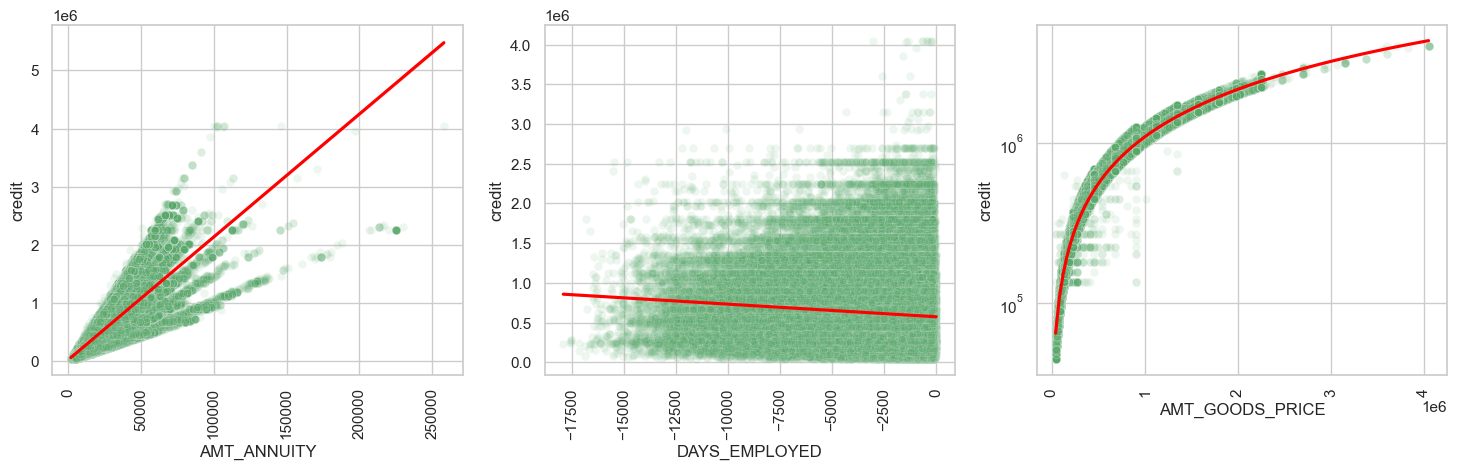

In [36]:
app_df['DAYS_EMPLOYED'] = app_df['DAYS_EMPLOYED'].abs() #convert into absolute value since some values are negative
threshold = 30000
app_df = app_df[app_df['DAYS_EMPLOYED'] <= threshold]#drop values above 30000 days, contained values of 365000+ days
                                                    # which is equal to 1000 years

app_df2['credit'] = app_df["AMT_CREDIT"]


plt.figure(figsize=(18,10))
num_rows = 2
num_cols = 3

columns = ["AMT_ANNUITY", "DAYS_EMPLOYED", "AMT_GOODS_PRICE"]

for i, var in enumerate(columns):
    plt.subplot(num_rows, num_cols, i % (num_rows * num_cols) + 1)  # adjust indexing
    sns.scatterplot(x=var, y='credit', data=app_df2, alpha=0.10, color='g')
    
    # add regression line
    sns.regplot(x=var, y='credit', data=app_df2, scatter=False, color='blue', line_kws={'color': 'red'})
    
    plt.xticks(rotation=90)

# Use log scale for the y-axis
plt.yscale('log')

plt.show()


In [ ]:
# same statistical analysis for the amount of the good purchased and the credit amount

app_df_cleaned = app_df[['AMT_GOODS_PRICE', 'AMT_CREDIT']].dropna()


correlation_coefficient = np.corrcoef(app_df_cleaned['AMT_GOODS_PRICE'], app_df_cleaned['AMT_CREDIT'])[0, 1]
print('Correlation coefficient:', correlation_coefficient)

statistic, pvalue = stats.ttest_ind(app_df_cleaned['AMT_GOODS_PRICE'], app_df_cleaned['AMT_CREDIT'], equal_var=False)
print('T-stat:', statistic, 'P-value:', pvalue)

X = sm.add_constant(app_df_cleaned['AMT_CREDIT'])
y = app_df_cleaned['AMT_GOODS_PRICE']
model = sm.OLS(y, X).fit()
print(model.summary())



Correlation Coefficient:

The correlation coefficient between 'AMT_GOODS_PRICE' and 'AMT_CREDIT' is approximately 0.9865.
A value close to 1 indicates a strong positive linear relationship between the two variables.
T-test:

The t-statistic is -56.68, and the p-value is 0.0.
The low p-value indicates that we can reject the null hypothesis that the population means of 'AMT_GOODS_PRICE' and 'AMT_CREDIT' are equal.
The negative t-statistic suggests that, on average, 'AMT_GOODS_PRICE' is significantly lower than 'AMT_CREDIT'.
OLS Regression Results:

The R-squared value is 0.973, indicating that approximately 97.3% of the variance in 'AMT_GOODS_PRICE' can be explained by 'AMT_CREDIT'.
The coefficient for 'AMT_CREDIT' is 0.9057, suggesting that, on average, a one-unit increase in 'AMT_CREDIT' is associated with a 0.9057 increase in 'AMT_GOODS_PRICE'.
The intercept is -4636.92, which is the estimated value of 'AMT_GOODS_PRICE' when 'AMT_CREDIT' is zero. However, this might not have a practical interpretation in this context.
Additional Information:

The F-statistic is very high, indicating that the overall model is statistically significant.
The AIC and BIC values are measures of model fit, and lower values are generally preferred. These values can be used to compare models.
Conclusion:

The high correlation coefficient and the results of the t-test and regression analysis suggest a strong positive relationship between 'AMT_GOODS_PRICE' and 'AMT_CREDIT'.
The regression model explains a significant portion of the variance in 'AMT_GOODS_PRICE' based on 'AMT_CREDIT'.
It's important to note that correlation does not imply causation, and further analysis or domain knowledge may be needed to understand the underlying relationships between these variables.

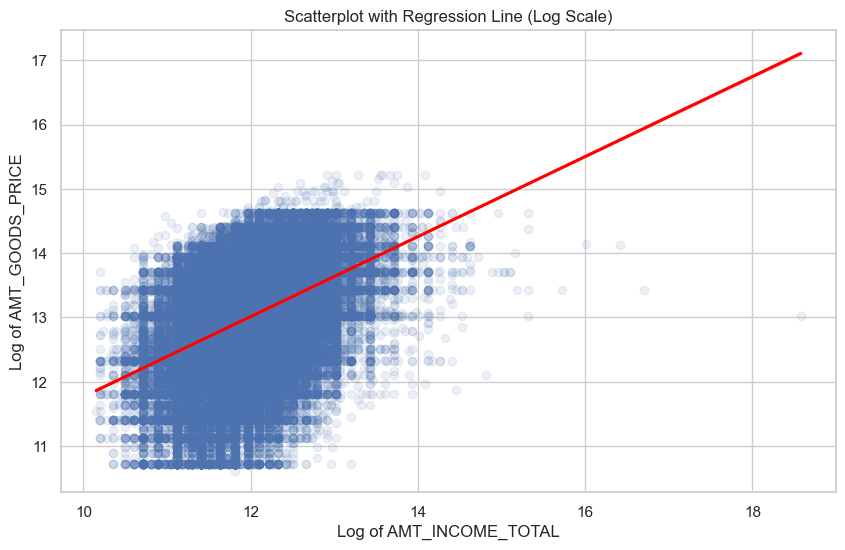

In [37]:
app_df2 = app_df.copy()

# turn 'AMT_GOODS_PRICE' and 'AMT_INCOME_TOTAL' into log
app_df2['log_goods_price'] = np.log1p(app_df2['AMT_GOODS_PRICE'])
app_df2['log_income_total'] = np.log1p(app_df2['AMT_INCOME_TOTAL'])

# regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='log_income_total', y='log_goods_price', data=app_df2, scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})


plt.xlabel('Log of AMT_INCOME_TOTAL')
plt.ylabel('Log of AMT_GOODS_PRICE')
plt.title('Scatterplot with Regression Line (Log Scale)')
plt.show()

# graph supports statistical analysis above


CONCLUSION:


Our suggestion to the client is to aggresively pursue customers who seek expensive goods as they provide a greater return to the company and do not pose a significantly greater risk of default then clients who take out smaller loans.